In [1]:
import sys
sys.path.insert(0, '../../')
import numpy as np
from gasp import responses, simulation
import matplotlib.pyplot as plt

In [2]:
width = 256
height = 256
npcs = 16
TRs = [5e-3, 10e-3, 20e-3]
alpha = np.deg2rad(60)
gradient = 2 * np.pi
phantom_type = 'circle'

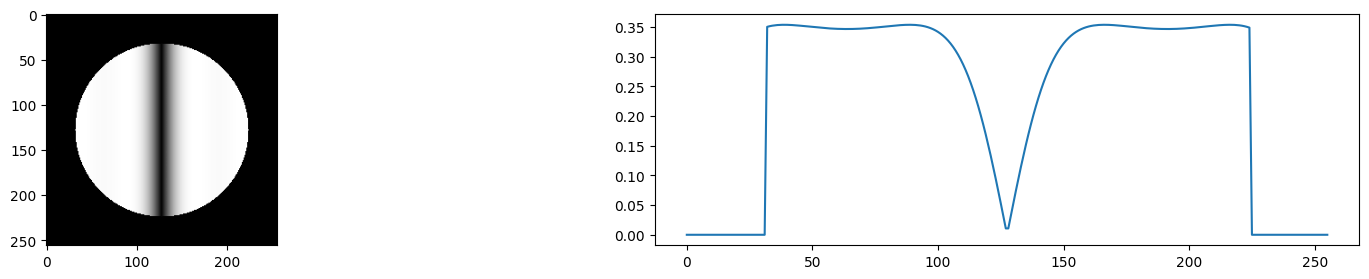

In [3]:
M = simulation.simulate_ssfp(npcs=npcs, TRs=TRs, alpha = alpha, gradient = gradient, phantom_type=phantom_type)
simulation.view_gasp_input(M)

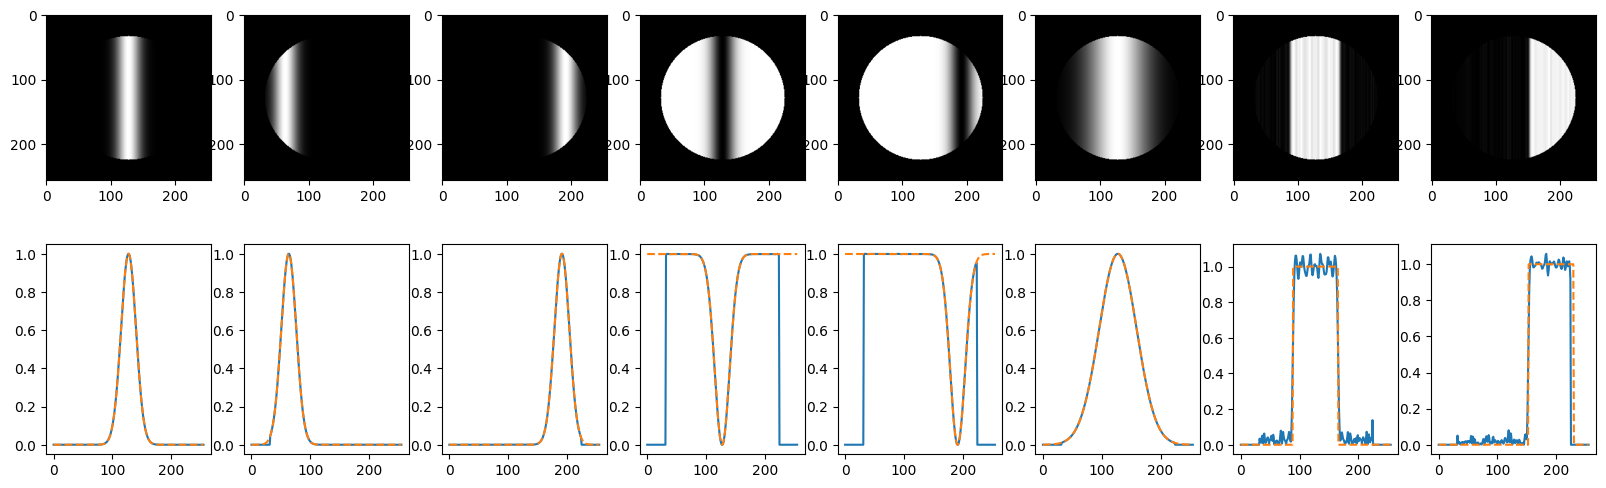

In [4]:
D = []
D.append(responses.gaussian(width, bw=0.2, shift=0))
D.append(responses.gaussian(width, bw=0.2, shift=-0.25))
D.append(responses.gaussian(width, bw=0.2, shift=0.25))
D.append(responses.notch(width, bw=0.2, shift=0))
D.append(responses.notch(width, bw=0.2, shift=0.25))
D.append(responses.gaussian(width, bw=0.5, shift=0))
D.append(responses.square(width, bw=0.3, shift=0))
D.append(responses.square(width, bw=0.3, shift=0.25))

G = []
A = []
for d in D:
    Ic, M, An = simulation.simulate_gasp(d, npcs=npcs, TRs=TRs, alpha = alpha, gradient = gradient, phantom_type=phantom_type)
    G.append(Ic)
    A.append(An)

simulation.view_gasp_comparison(G, D)

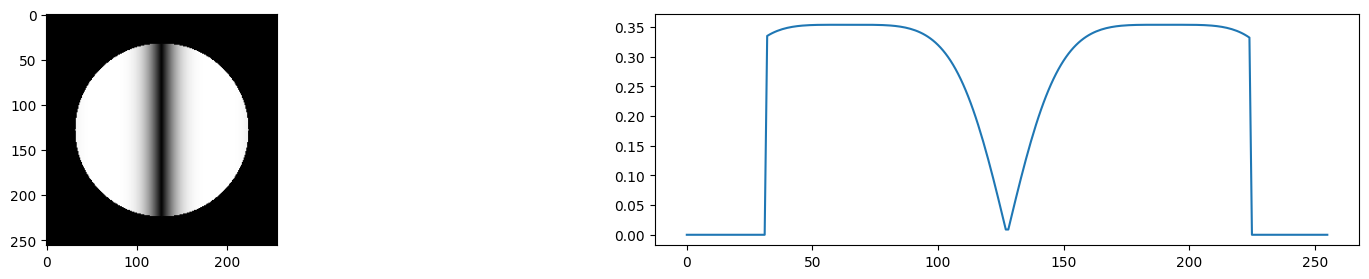

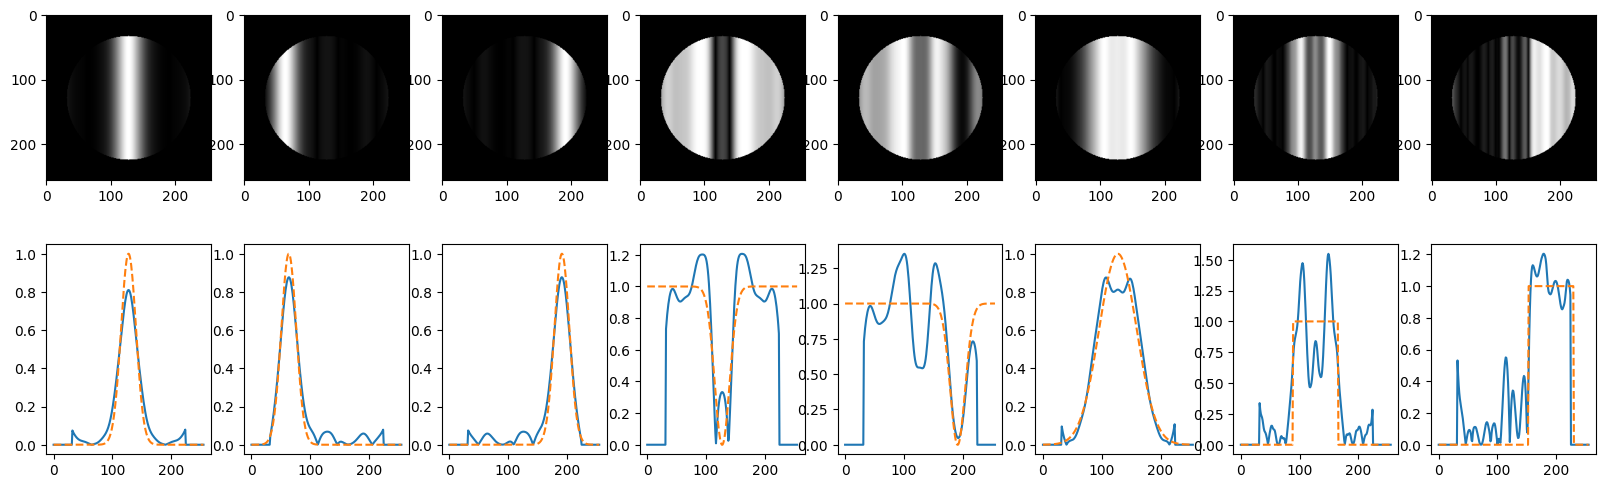

In [5]:
import numpy as np
import matplotlib.pyplot as plt

alpha = np.deg2rad(70)
gradient = 2 * np.pi
phantom_type = 'circle'

M = simulation.simulate_ssfp(npcs=npcs, TRs=TRs, alpha = alpha, gradient = gradient, phantom_type=phantom_type)
simulation.view_gasp_input(M)

I = []
M = np.reshape(M,(M.shape[0], M.shape[0], -1))
for An in A:
    In = simulation.evaluate_gasp(M, An[0])
    I.append(In)

simulation.view_gasp_comparison(I, D)

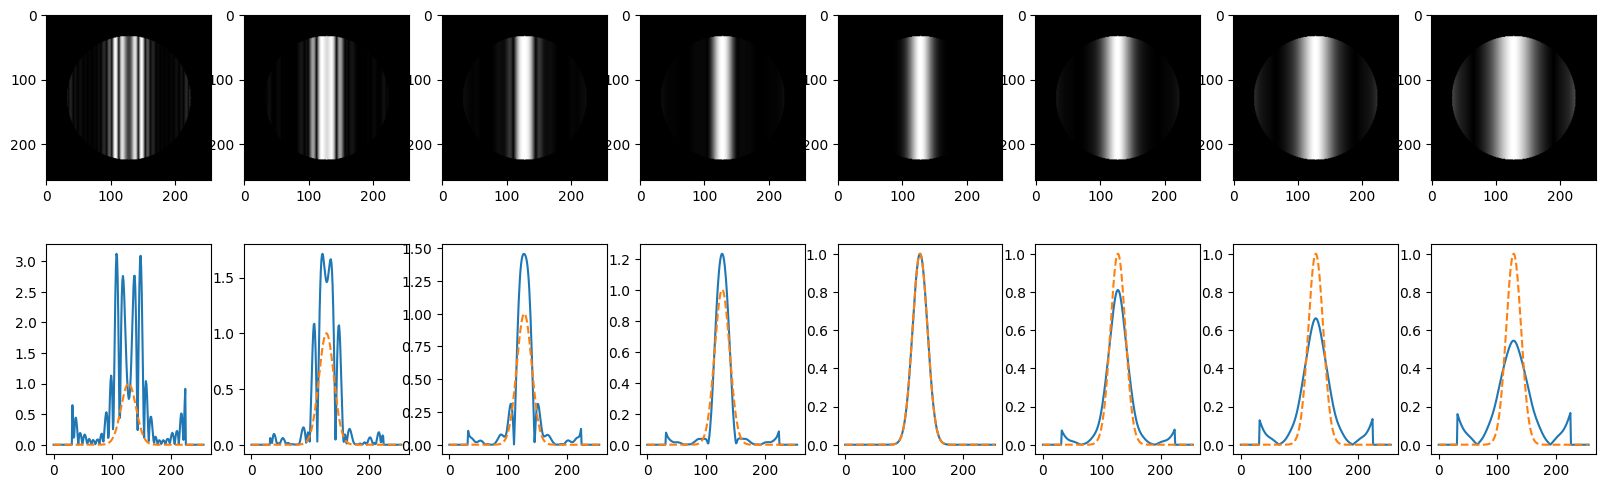

In [6]:
import numpy as np
import matplotlib.pyplot as plt

alpha = np.deg2rad(np.linspace(20,90,8))
gradient = 2 * np.pi
phantom_type = 'circle'

di = 0

I = []
for i in range(8):
    M = simulation.simulate_ssfp(npcs=npcs, TRs=TRs, alpha = alpha[i], gradient = gradient, phantom_type=phantom_type)
    M = np.reshape(M,(M.shape[0], M.shape[0], -1))
    An = A[di]
    In = simulation.evaluate_gasp(M, An[0])
    I.append(In)

d = [D[di], D[di],D[di],D[di],D[di],D[di],D[di],D[di]]
simulation.view_gasp_comparison(I, d)

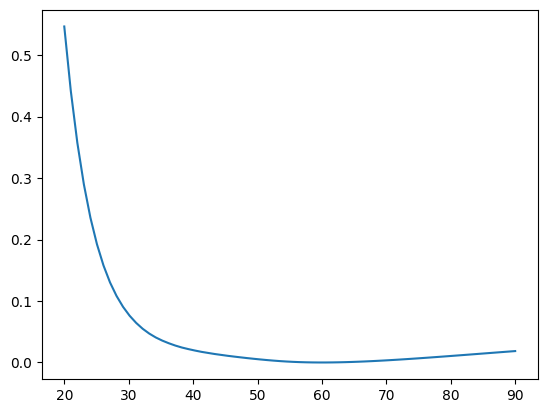

In [7]:
alpha = np.deg2rad(np.linspace(20,90,70))
gradient = 2 * np.pi
phantom_type = 'circle'

di = 0

I = []
for _alpha in alpha:
    M = simulation.simulate_ssfp(npcs=npcs, TRs=TRs, alpha = _alpha, gradient = gradient, phantom_type=phantom_type)
    M = np.reshape(M,(M.shape[0], M.shape[0], -1))
    An = A[di]
    In = simulation.evaluate_gasp(M, An[0])
    I.append(In)

MSE = []
for In in I:
    yhat = np.abs(In[int(In.shape[0]/2), :])
    y = D[di]
    mse = ((y - yhat)**2).mean(axis=0)
    MSE.append(mse)

plt.plot(np.rad2deg(alpha), MSE)

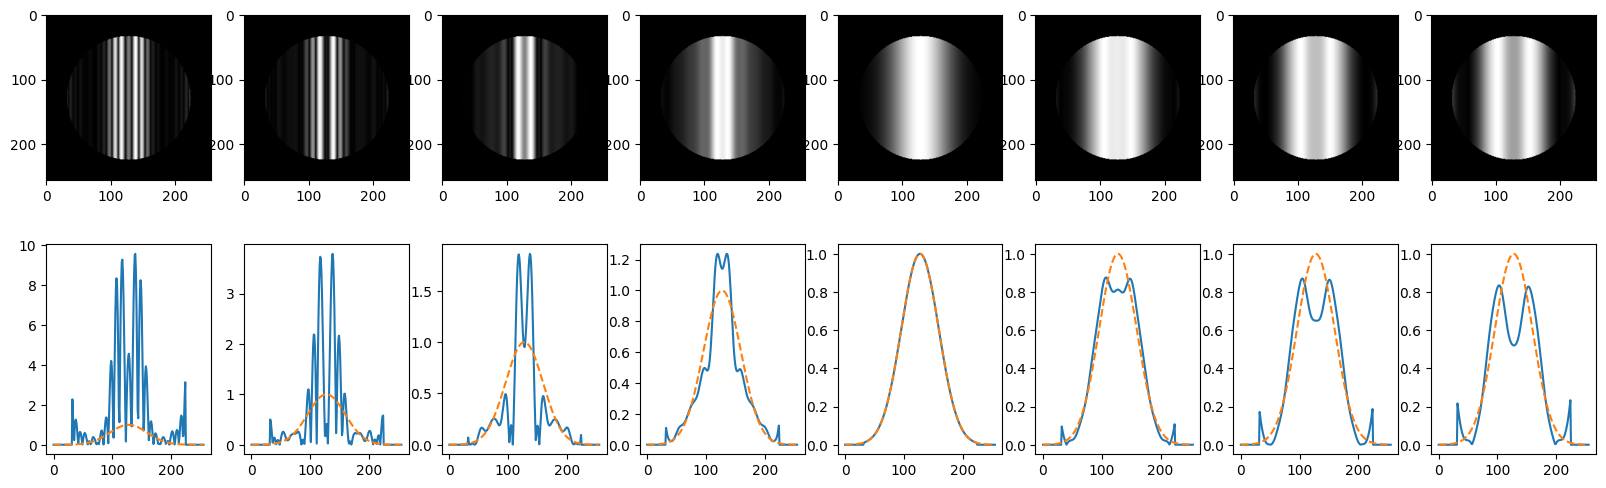

In [8]:
import numpy as np
import matplotlib.pyplot as plt

alpha = np.deg2rad(np.linspace(20,90,8))
gradient = 2 * np.pi
phantom_type = 'circle'

di = 5

I = []
for i in range(8):
    M = simulation.simulate_ssfp(npcs=npcs, TRs=TRs, alpha = alpha[i], gradient = gradient, phantom_type=phantom_type)
    M = np.reshape(M,(M.shape[0], M.shape[0], -1))
    An = A[di]
    In = simulation.evaluate_gasp(M, An[0])
    I.append(In)

d = [D[di], D[di],D[di],D[di],D[di],D[di],D[di],D[di]]
simulation.view_gasp_comparison(I, d)

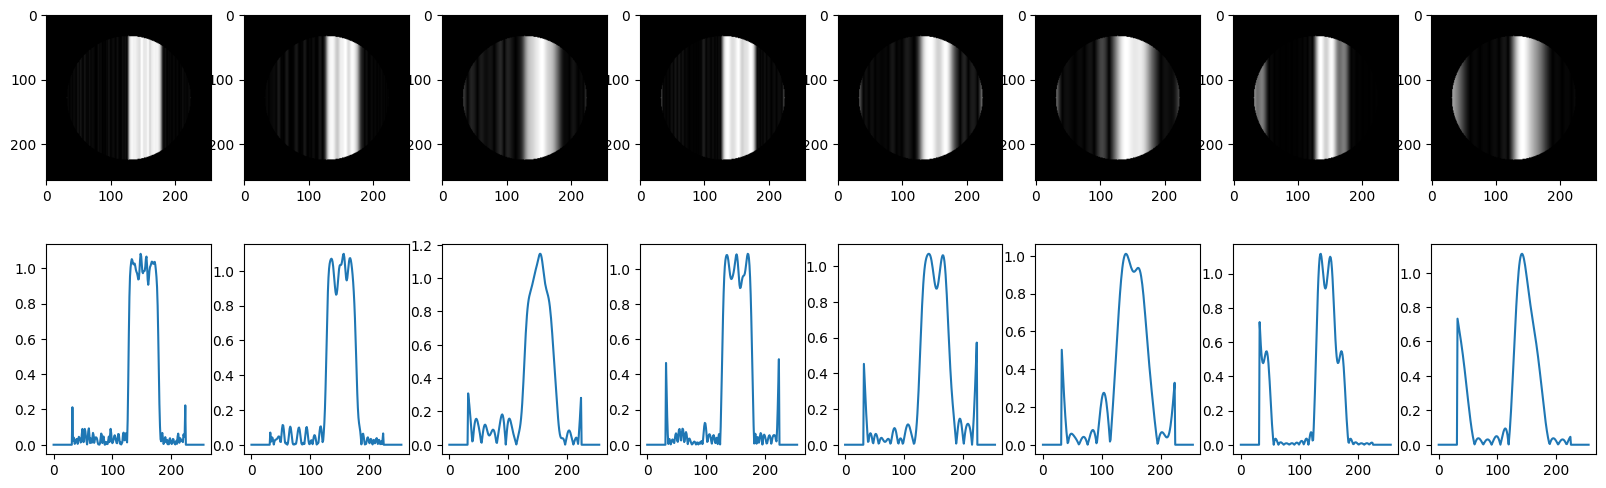

In [8]:
width = 256
height = 256
npcs = 16
alpha = np.deg2rad(60)
gradient = 2 * np.pi
phantom_type = 'circle'
D = responses.notch(width, bw=0.2, shift=0.1)

P = [{ 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':8, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':4, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':16, 'TRs':[5e-3, 10e-3] },
     { 'npcs':8, 'TRs':[5e-3, 10e-3] },
     { 'npcs':4, 'TRs':[5e-3, 10e-3] },
    { 'npcs':16, 'TRs':[5e-3] },
     { 'npcs':8, 'TRs':[5e-3] }]

G = []
A = []
for p in P:
    M = simulation.simulate_ssfp(width=width, height=height, npcs=p['npcs'], TRs=p['TRs'], alpha = alpha, gradient = gradient, phantom_type=phantom_type)
    Ic, M, An = simulation.simulate_gasp(D, npcs=p['npcs'], TRs=p['TRs'], alpha = alpha, gradient = gradient, phantom_type=phantom_type)
    G.append(Ic)
    A.append(An)

simulation.view_gasp_comparison(G, D)
